# Domestic Flights in 2015
### Sophie Giacobbe, 2023
https://github.com/sgiacobbe/Flights/tree/main

Since I stepped foot on my first airplane when I was just a few months old, my dad has kept track of every flight I’ve ever been on. 384 flights later, I’ve come to realize both my passion for travel and my passion for data. Though my personal flight data set isn’t nearly large enough nor complex enough to build an entire project around, I knew immediately that I wanted to explore something similar.<br>
<br>
Through Kaggle, I was able to find a dataset that fit my interests perfectly. The Department of Transportation keeps a record of all flight information by month. This information was compiled across the year 2015 into Flights.csv and posted with the question: which airline should you fly on to avoid significant delays? I used this data to answer some of my own questions, just generally and about delays, taxiing, and schedules.<br>
<br>
Below is a dataset of airline IATA codes as well as airport IATA codes which will be used throughout this analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

In [30]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [14]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


### General:
To begin, I wanted to answer some general questions I have about these flights such as:<br>
* Which airports were most/least popular to fly in/out of?<br>
* What were the most/least popular reasons for flight cancellations?<br>
* What day of the week was the most/least popular to fly on?<br>
* Which airline was flown the most/least?

In [15]:
flightcount_d = flights.groupby('ORIGIN_AIRPORT').count()
flightcount_d.max()
flightcount_d.min()
flightcount_a = flights.groupby('DESTINATION_AIRPORT').count()
flightcount_a[flightcount_a['FLIGHT_NUMBER'] == 66741]
flightcount_d[flightcount_d['FLIGHT_NUMBER'] == 66599]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
ORIGIN_AIRPORT,,,,,,,,,,,,,,,,,,,,,
ATL,66599,66599,66599,66599,66599,66599,66481,66599,66599,65219,...,65142,65017,66599,66599,1413,11549,11549,11549,11549,11549


In [16]:
flightcount_d[flightcount_d['FLIGHT_NUMBER'] == 6]
flightcount_a[flightcount_a['FLIGHT_NUMBER'] == 6]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
DESTINATION_AIRPORT,,,,,,,,,,,,,,,,,,,,,
ITH,6,6,6,6,6,6,6,6,6,4,...,4,4,6,6,2,2,2,2,2,2


The airport with both the most departing and arriving flights is Hartsfield-Jackson Atlanta International Airport (ATL).
The airport with both the least departing and arriving flights is Ithica Tompkins Regional Airport (ITH).

In [100]:
flights.count()
flights.groupby('CANCELLATION_REASON').count()['FLIGHT_NUMBER']
cancelled = flights[flights['CANCELLED'] == 1]
np.sum(cancelled['CANCELLED'])

40527

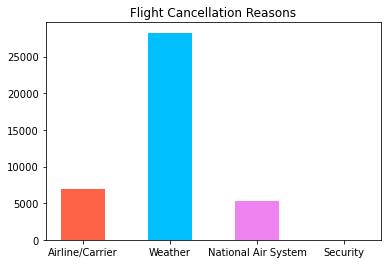

In [101]:
cancel = {'Airline/Carrier':6974, 'Weather':28260, 'National Air System':5291, 'Security':2}
reason = list(cancel.keys())
num = list(cancel.values())
colors = ['tomato','deepskyblue', 'violet', 'gold', 'yellowgreen']
plt.bar(reason, num, width = 0.5, color = colors)
plt.title('Flight Cancellation Reasons')
plt.show()

In 2015, 40,527 flights were cancelled. 28,260, or roughly 70% of these flights were cancelled due to weather complications. Only 2 were because of security reasons. 

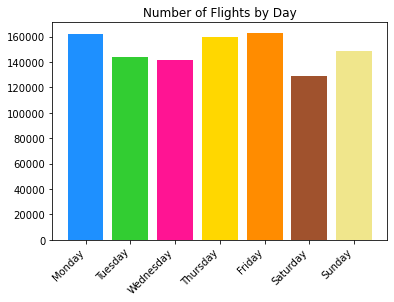

In [102]:
flights.groupby('DAY_OF_WEEK').count()
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
num_byday = flights.groupby('DAY_OF_WEEK').count()['DAY']
colors2 = ['dodgerblue','limegreen','deeppink','gold','darkorange','sienna','khaki']
plt.bar(day, num_byday, color = colors2)
plt.xticks(rotation=45, ha = 'right')
plt.title('Number of Flights by Day')
plt.show()

The most popular day to fly on in 2015 was Friday, with 163,070 flights. This was closely followed by Monday, with 162,041 flights. The least popular day to fly on was Saturday, with 129,040 fligths.

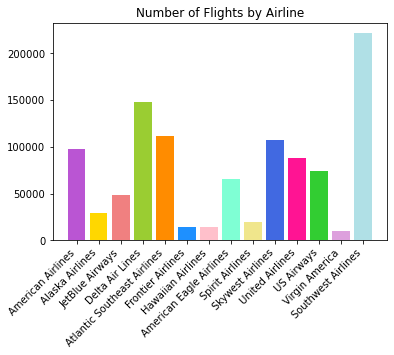

In [35]:
num_byairline = flights.groupby('AIRLINE').count()['FLIGHT_NUMBER']
airline = ('American Airlines', 'Alaska Airlines', 'JetBlue Airways', 'Delta Air Lines', 'Atlantic Southeast Airlines', 'Frontier Airlines', 'Hawaiian Airlines', 'American Eagle Airlines', 'Spirit Airlines', 'Skywest Airlines', 'United Airlines', 'US Airways', 'Virgin America', 'Southwest Airlines')
colors3 = ['mediumorchid','gold','lightcoral','yellowgreen','darkorange','dodgerblue','pink','aquamarine','khaki','royalblue','deeppink','limegreen','plum','powderblue']
plt.bar(airline, num_byairline, color = colors3)
plt.xticks(rotation=45, ha = 'right')
plt.title('Number of Flights by Airline')
plt.show()

Southwest Airlines was the most travelled airline with 221,586 flights in 2015. The next most travelled airline was Delta Airlines with 147,486 flights, and the third most travelled airline was Atlantic Southeast Airlines with 111,206 flights. 

### Delays:
Next I wanted to explore delays. This was the original intent of the kaggle data set. These are some of the questions I had going in:
* Which airline had the most delays?
* Which airport experienced the most delays?
* What was the most popular reason for delay?

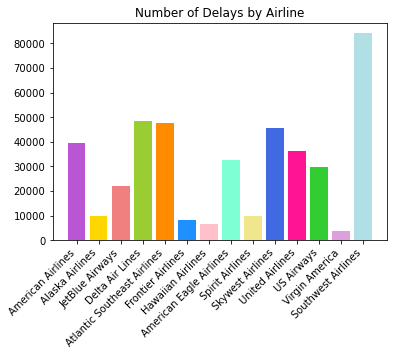

In [104]:
delay = flights[flights['ARRIVAL_DELAY'] > 0]
num_bydelay = delay.groupby('AIRLINE').count()['FLIGHT_NUMBER']
plt.bar(airline, num_bydelay, color = colors3)
plt.xticks(rotation=45, ha = 'right')
plt.title('Number of Delays by Airline')
plt.show()

Southwest had the most delays with 84,124 flights leaving past the scheduled departure time. This is nearly twice the number of delays from Delta, the next highest number of delays with 48,298. This closely followed by Atlantic Southeast Airlines, with 47,563 delays. 

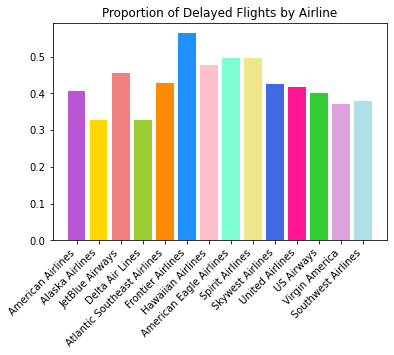

In [105]:
plt.bar(airline, num_bydelay/num_byairline, color = colors3)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Proportion of Delayed Flights by Airline')
plt.show()

Because the number of delays is likely biased by the number of flights, another graph was made with the proportion of delayed flights to number of total flights in 2015 by airline. In this analysis, it can be seen that Frontier Airlines has the highest proportion of delayed flights with 56.34% of their flights leaving past the intended time. The airlines with the lowest proportion of delayed flights are Delta Airlines with 37.75% of flights getting delayed and Alaska Airlines with 32.80% of flights getting delayed. 

In [23]:
delay_a = delay.groupby('DESTINATION_AIRPORT').count()
delay_a.max()
delay_a[delay_a['FLIGHT_NUMBER'] == 24880]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
DESTINATION_AIRPORT,,,,,,,,,,,,,,,,,,,,,
ORD,24880,24880,24880,24880,24880,24880,24880,24880,24880,24880,...,24880,24880,24880,24880,0,15135,15135,15135,15135,15135


In [24]:
delay_a = delay.groupby('ORIGIN_AIRPORT').count()
delay_a.max()
delay_a[delay_a['FLIGHT_NUMBER'] == 26257]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
ORIGIN_AIRPORT,,,,,,,,,,,,,,,,,,,,,
ORD,26257,26257,26257,26257,26257,26257,26257,26257,26257,26257,...,26257,26257,26257,26257,0,17148,17148,17148,17148,17148


The destination airport with the most incoming delayed flights is Chicago O'Hare. The origin airport with the most outgoing delayed flights is also Chicago O'Hare.

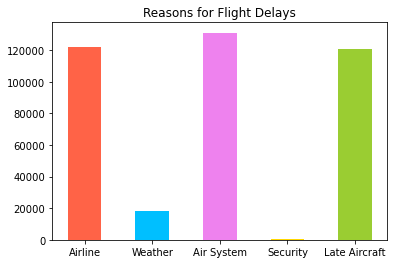

In [106]:
delay[delay['AIR_SYSTEM_DELAY'] >0 ].count()
delay[delay['SECURITY_DELAY'] >0 ].count()
delay[delay['AIRLINE_DELAY'] >0 ].count()
delay[delay['LATE_AIRCRAFT_DELAY'] >0 ].count()
delay[delay['WEATHER_DELAY'] >0 ].count()
delay_reason = {'Airline':122239, 'Weather':18038, 'Air System':131134, 'Security':605, 'Late Aircraft':120928}
reason = list(delay_reason.keys())
num = list(delay_reason.values())
plt.bar(reason, num, width = 0.5, color = colors)
plt.title('Reasons for Flight Delays')
plt.show()

The most popular reason for delay is Air System with 131,134 delays. The least popular reason for delay is Security, with only 605 delays. Weather also has a very low number of delays in comparison, so we can see that most delays have to do with the airline or system, being that late aircrafts are due to previous delays. 

### Taxiing:
The time in between getting on the airplane and the airplane actually taking off is arguably the most frustrating time as a traveller. Because of this, I wanted to explore more about taxiing in this data set. Here are some questions I sought to answer:
* Which flights had the longest taxi time?
* Which airline has the most taxi time overall?
* Which airline taxis the most proportionally?


In [108]:
flights['TAXI_OUT'].max()
flights[flights['TAXI_OUT'] == 225]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
878906,2015,2,27,5,AA,125,N4XBAA,DFW,ATL,1415,...,2250.0,337.0,0,0,NaN,202.0,0.0,0.0,0.0,135.0


The flight that had the longest taxi time when taking off (225 miutes) was an American Airlines flight going from Dallas Fort Worth International Airport (DFW) to Hartsfield-Jackson Atlanta International Airport (ATL).

In [109]:
flights['TAXI_IN'].max()
flights[flights['TAXI_IN'] == 202]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
789294,2015,2,21,6,AA,1406,N3GMAA,MIA,JFK,2105,...,416.0,260.0,0,0,NaN,192.0,0.0,0.0,0.0,68.0


The flight that had the longest taxi time when landing (202 minutes) was an American Airlines flight going from Miami International Airport (MIA) to John F Kennedy International Airport (JFK).

In [110]:
flights['TOTAL_TAXI'] = flights['TAXI_OUT'] + flights['TAXI_IN']

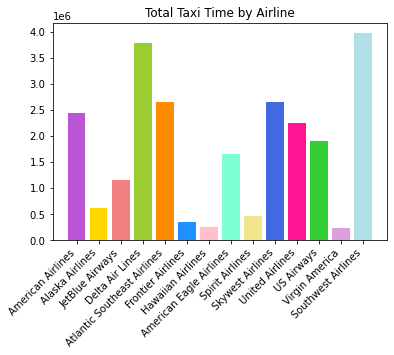

In [111]:
num_bytaxi = flights.groupby('AIRLINE').sum()['TOTAL_TAXI']
plt.bar(airline, num_bytaxi, color = colors3)
plt.xticks(rotation=45, ha = 'right')
plt.title('Total Taxi Time by Airline')
plt.show()

The airline with the most total taxi time in 2015 is Southwest with 3,968,206 minutes. This is followed by Delta Airlines with 3,779,975 minutes. The airline with the least total taxi time in 2015 is Virgin America with 231,250 minutes.

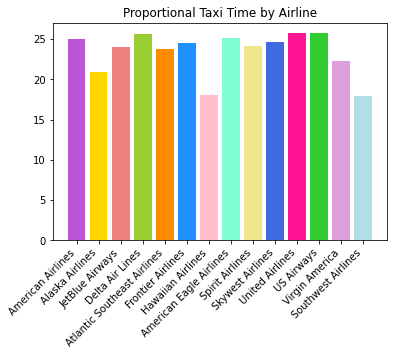

In [112]:
plt.bar(airline, num_bytaxi/num_byairline, color = colors3)
plt.xticks(rotation=45, ha = 'right')
plt.title('Proportional Taxi Time by Airline')
plt.show()

Because the total number of minutes taxiing is likely biased by the number of flights each airline sends out, another analysis was done showing proportion of minutes taxiing to each flight. In this analysis, it can be seen that Southwest Airlines actually has the lowest average taxi time, 17.91 minutes, closely followed by Hawaiian airlines with an average taxi time of 18.01 mintues. United Airlines has the longest taxi time on average with 25.73 minutes. All the airlines have very similar taxi averages, with the range only being eight minutes wide. 

### Scheduled Time:
Finally, I had some questions about scheduled time. Here are the questions I asked:
* What was the longest scheduled flight?
* Which airlines offer this flight and which one offered the shortest travel time?
* Which is the most punctual airline?

In [145]:
flights[flights['SCHEDULED_TIME'] == 718]
flights[flights['SCHEDULED_TIME'] == 20]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TOTAL_TAXI
578448,2015,2,8,7,EV,3925,N14542,SWF,LGA,1040,...,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015853,2015,3,8,7,AS,65,N794AS,WRG,PSG,1101,...,9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
1032686,2015,3,9,1,AS,65,N797AS,WRG,PSG,1101,...,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,13.0


The longest scheduled flight is a Delta Airlines flight from John F Kennedy International Airport (JFK) to Honolulu International Airport (HNL) at 718 min. There are two shortest scheduled flights at 20 minutes. The first is an Atlantic Southeast Airlines flight from Stewart International Airport (SWF) to LaGuardia Airport (LGA). The other is an Alaska Airlines flights from Wrangell Airport (WRG) to Petersberg James A Johnson Airport (PSG). 

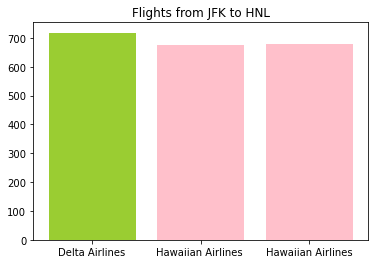

In [116]:
j_flights = flights[flights['ORIGIN_AIRPORT'] == 'JFK']
jh_flights = j_flights[j_flights['DESTINATION_AIRPORT'] == 'HNL']
np.histogram(jh_flights['SCHEDULED_TIME'])
jh_flights[jh_flights['SCHEDULED_TIME'] == 675]
jh_flights[jh_flights['SCHEDULED_TIME'] == 680]
flight_time = [718, 675, 680]
line = ['Delta Airlines', 'Hawaiian Airlines ', 'Hawaiian Airlines']
colors4 = ['yellowgreen', 'pink', 'pink']
plt.bar(line, flight_time, color = colors4)
plt.title('Flights from JFK to HNL')
plt.show()

The flight from John F Kennedy International Airport (JFK) to Honolulu International Airport (HNL) is also offered from Hawaiian Airlines at both 675 minutes and 680 minutes.

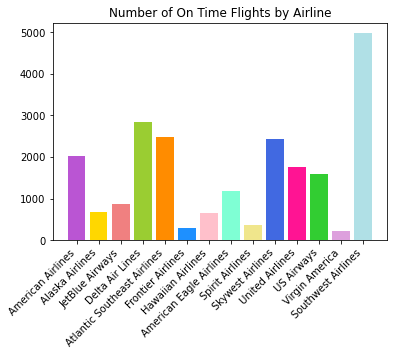

In [117]:
punctual = flights[flights['ARRIVAL_DELAY'] == 0]
punctuality = punctual.groupby('AIRLINE').count()['DAY']
plt.bar(airline, punctuality, color = colors3)
plt.xticks(rotation=45, ha = 'right')
plt.title('Number of On Time Flights by Airline')
plt.show()

Southwest Airlines has the most on-time flights with 4,976 flights with no arrival delay. Virgin America has is the least on-time airline wth 233 flights with no arrival delay.

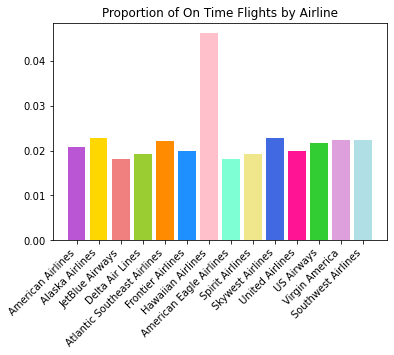

In [118]:
plt.bar(airline, punctuality/num_byairline, color = colors3)
plt.xticks(rotation=45, ha = 'right')
plt.title('Proportion of On Time Flights by Airline')
plt.show()

Because these numbers are likely influenced by the number of flights from each airline, another analysis was run with the proportion of flights with no delays. In this graph, we can see that Hawaiian Airlines is the most on-time airline, with 4.62% of their flights having 0 delay. All the other airlines have very close to 2% of flights with no delays. 

To conclude, it seems that the best airline to fly in order to avoid delays is Hawaiian Airlines. This, however, may be problematic in the sense that Hawaiian Airlines generally only offers flights that will take you to and from Hawaii, so it might not be practical to try and fly Hawaiian. It doesn't seem that the other airlines have much of a difference in punctuality, all ranging from 1.8% to 2.2%. Avoiding delays in travel may have to be left up to luck. 